# Linear regresion from scratch

In [1]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

import pandas as pd
import numpy as np

/home/gilles/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

In [2]:
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
boston = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

In [4]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
boston['MEDV'] = boston_dataset['target']

In [6]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [9]:
import matplotlib.pyplot as plt

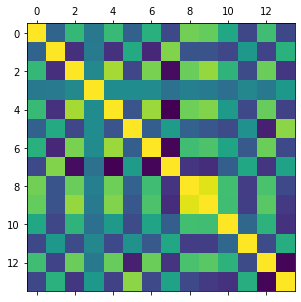

In [10]:
plt.matshow(boston.corr())

In [11]:
X = boston['RM']
Y = boston['MEDV']

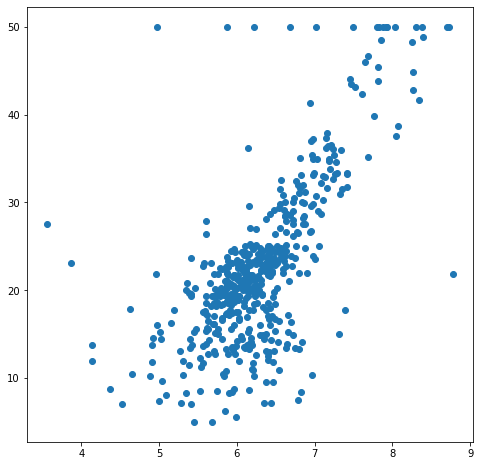

In [12]:
plt.figure(figsize=(8, 8))
plt.scatter(X, Y)

In [13]:
np.c_??

In [27]:
class LinearRegression:
    def __init__(self):
        self.coef_ = 0
        self.intercept_ = 0
        self.L = 0.01
        self.epochs = 50000

    # Nous allons définir la fonction de la fonction coût basée sur MSE
    def loss_funtion(self, a, b, points):
        total_error = 0
        for i in range(len(points)):
            x = points.iloc[i].RM
            y = points.iloc[i].MEDV
            total_error += (y - (a*x + b)) ** 2
        return total_error / len(points)

    # La fonction d'optimisation
    def gradient_descent(self, a_now, b_now, points, L):
        # les valeurs par défaut des pentes pour les dérivé en a et b
        a_gradient = 0
        b_gradient = 0

        # longueur du data
        n = len(points)

        # calcul des dérivés
        for i in range(n):
            # extraction des x et y du data
            x = points.iloc[i].RM
            y = points.iloc[i].MEDV

            # calcul des dérivés
            a_gradient += (x * (a_now * x + b_now - y)) / n
            b_gradient += (a_now * x + b_now - y) / n

        # calcul des nouveaux parametres
        a = a_now - a_gradient * L
        b = b_now - b_gradient * L

        return a, b

    def fit(self, X, Y):
        L = self.L
        a = self.coef_
        b = self.intercept_
        points = pd.DataFrame(data=np.c_[X, Y], columns=['RM', 'MEDV'])
        for i in range(self.epochs):
            if i % 50 == 0:
                print(f"Epoch: {i}")
            a, b = self.gradient_descent(a, b, points, L)
        self.coef_ = a
        self.intercept_ = b
        
    def predict(self, X_test):
        a = self.coef_
        b = self.intercept_
        return a * X_test["RM"] + b
    
    def score(self, X_test, Y_test):
        try:
            Y_test_predict = self.predict(X_test)
            residuals = Y_test - Y_test_predict
            
            return 1 - (residuals**2).sum() / ((Y_test - Y_test.mean())**2).sum()
        except:
            print("Error !!!!")
    

In [15]:
X = boston[['RM']]
Y = boston['MEDV']

In [16]:
X

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147
...,...
501,6.593
502,6.120
503,6.976
504,6.794


In [17]:
np.c_[X,Y]

array([[ 6.575, 24.   ],
       [ 6.421, 21.6  ],
       [ 7.185, 34.7  ],
       ...,
       [ 6.976, 23.9  ],
       [ 6.794, 22.   ],
       [ 6.03 , 11.9  ]])

In [18]:
pd.DataFrame(data=np.c_[X, Y], columns=['RM', 'MEDV'])

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2
...,...,...
501,6.593,22.4
502,6.120,20.6
503,6.976,23.9
504,6.794,22.0


In [28]:
model = LinearRegression()

In [20]:
506 * 0.7

354.2

In [21]:
X.loc[:354]

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147
...,...
350,6.490
351,6.579
352,5.884
353,6.728


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [29]:
model.fit(X_train, Y_train)

Epoch: 0
Epoch: 50
Epoch: 100
Epoch: 150
Epoch: 200
Epoch: 250
Epoch: 300
Epoch: 350
Epoch: 400
Epoch: 450
Epoch: 500
Epoch: 550
Epoch: 600
Epoch: 650
Epoch: 700
Epoch: 750
Epoch: 800
Epoch: 850
Epoch: 900
Epoch: 950
Epoch: 1000
Epoch: 1050
Epoch: 1100
Epoch: 1150
Epoch: 1200
Epoch: 1250
Epoch: 1300
Epoch: 1350
Epoch: 1400
Epoch: 1450
Epoch: 1500
Epoch: 1550
Epoch: 1600
Epoch: 1650
Epoch: 1700
Epoch: 1750
Epoch: 1800
Epoch: 1850
Epoch: 1900
Epoch: 1950
Epoch: 2000
Epoch: 2050
Epoch: 2100
Epoch: 2150
Epoch: 2200
Epoch: 2250
Epoch: 2300
Epoch: 2350
Epoch: 2400
Epoch: 2450
Epoch: 2500
Epoch: 2550
Epoch: 2600
Epoch: 2650
Epoch: 2700
Epoch: 2750
Epoch: 2800
Epoch: 2850
Epoch: 2900
Epoch: 2950
Epoch: 3000
Epoch: 3050
Epoch: 3100
Epoch: 3150
Epoch: 3200
Epoch: 3250
Epoch: 3300
Epoch: 3350
Epoch: 3400
Epoch: 3450
Epoch: 3500
Epoch: 3550
Epoch: 3600
Epoch: 3650
Epoch: 3700
Epoch: 3750
Epoch: 3800
Epoch: 3850
Epoch: 3900
Epoch: 3950
Epoch: 4000
Epoch: 4050
Epoch: 4100
Epoch: 4150
Epoch: 4200
Epo

Epoch: 32400
Epoch: 32450
Epoch: 32500
Epoch: 32550
Epoch: 32600
Epoch: 32650
Epoch: 32700
Epoch: 32750
Epoch: 32800
Epoch: 32850
Epoch: 32900
Epoch: 32950
Epoch: 33000
Epoch: 33050
Epoch: 33100
Epoch: 33150
Epoch: 33200
Epoch: 33250
Epoch: 33300
Epoch: 33350
Epoch: 33400
Epoch: 33450
Epoch: 33500
Epoch: 33550
Epoch: 33600
Epoch: 33650
Epoch: 33700
Epoch: 33750
Epoch: 33800
Epoch: 33850
Epoch: 33900
Epoch: 33950
Epoch: 34000
Epoch: 34050
Epoch: 34100
Epoch: 34150
Epoch: 34200
Epoch: 34250
Epoch: 34300
Epoch: 34350
Epoch: 34400
Epoch: 34450
Epoch: 34500
Epoch: 34550
Epoch: 34600
Epoch: 34650
Epoch: 34700
Epoch: 34750
Epoch: 34800
Epoch: 34850
Epoch: 34900
Epoch: 34950
Epoch: 35000
Epoch: 35050
Epoch: 35100
Epoch: 35150
Epoch: 35200
Epoch: 35250
Epoch: 35300
Epoch: 35350
Epoch: 35400
Epoch: 35450
Epoch: 35500
Epoch: 35550
Epoch: 35600
Epoch: 35650
Epoch: 35700
Epoch: 35750
Epoch: 35800
Epoch: 35850
Epoch: 35900
Epoch: 35950
Epoch: 36000
Epoch: 36050
Epoch: 36100
Epoch: 36150
Epoch: 36200

In [ ]:
Y_test_predict = model.predict(X_test)

In [ ]:
plt.figure(figsize=(12,12))
plt.scatter(X_test, Y_test, label="testing data")
plt.plot(X_test, Y_test_predict, label="prediction")
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.legend(loc="upper left")

In [ ]:
Y_test_predict

In [30]:
model.coef_

8.447565617960585

In [31]:
model.intercept_

-30.48543905118321

In [32]:
model.score(X_test, Y_test)

0.6012630666233936